In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path


def creating_folder(Ascombe_Quarter_Exercise: str) -> None:
    if os.path.exists(Ascombe_Quarter_Exercise):
        print ("File exist")
    else:
            os.makedirs(Ascombe_Quarter_Exercise)
            
    print("Created folder named Ascombe_Quarter_Exercise")
        
def acsombe_dataset_download() -> pd.DataFrame:

    anscombe_df = sns.load_dataset("anscombe")
    print(anscombe_df)
    return anscombe_df

def ascombe_dataset_plots(anscombe_df: pd.DataFrame) -> print:
    sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe_df,
               col_wrap=2, palette="muted", height=4)
    plt.gcf().suptitle("Anscombe's Quartet", x=0.5, y=1)
    plt.savefig('Ascombe_Quarter_Exercise/ascombe_plot.jpg')
    plt.show()
    print("Created")
     
def ascombe_dataset_calculations(anscombe_df: pd.DataFrame) -> print:
    grouped = anscombe_df.groupby('dataset')
    scores_into_csv_file = pd.DataFrame(columns=['mean_x', 'std_x', 'mean_y', 'std_y', 'correlation', 'var_x', 'var_y'])
    for key in grouped.groups.keys():
        scores_into_csv_file.loc[key] = (
            grouped.mean().loc[key]['x'],
            np.round(grouped.mean().loc[key]['y'], 2),
            np.round(grouped.std().loc[key]['x'], 5),
            np.round(grouped.std().loc[key]['y'], 2),
            np.round(grouped.corr().loc[(key, 'x')]['y'], 3),
            np.round(grouped.var().loc[key]['x'], 5),
            np.round(grouped.var().loc[key]['y'], 2),
        )
    
    scores_into_csv_file.to_csv('Ascombe_Quarter_Exercise/ascombe_calculations.csv')
    print("Created CSV file named Ascombe_Calculations")
    

In [34]:
def main():
    creating_folder("Ascombe_Quarter_Exercise")
    anscombe_df = acsombe_dataset_download()
    ascombe_dataset_plots(anscombe_df)
    ascombe_dataset_calculations(anscombe_df)

File exist
Created folder named Ascombe_Quarter_Exercise
   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38     

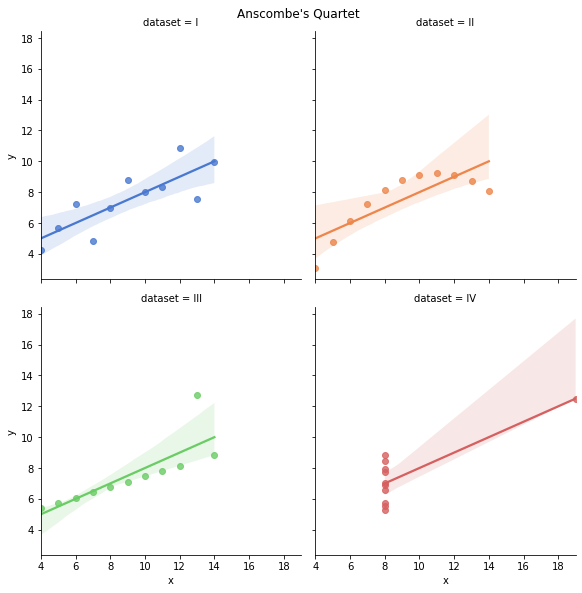

Created
Created CSV file named Ascombe_Calculations


In [35]:
if __name__ == "__main__":
    main()